In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression #For classification
from sklearn.decomposition import PCA #For Principal component analysis
from sklearn.model_selection import train_test_split, cross_validate #For split dataset and cross validation

In [3]:
data = pd.read_csv("../datasets/digit-recognizer/train.csv") #Import dataset 

# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

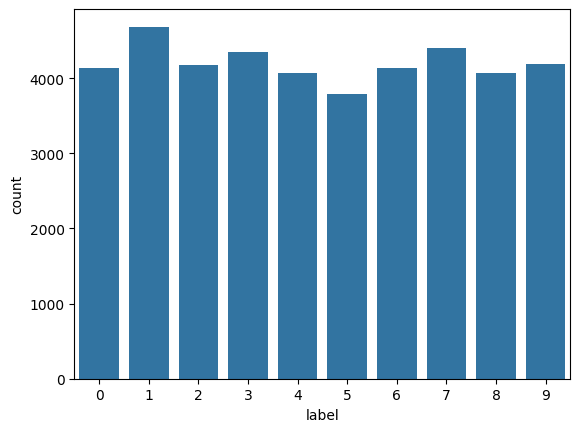

In [4]:
sns.countplot(data, x="label") #Visualize labels

In [5]:
X = data.drop(columns=["label"]) #I get only pixel values
y = data.label
X.shape, y.shape

((42000, 784), (42000,))

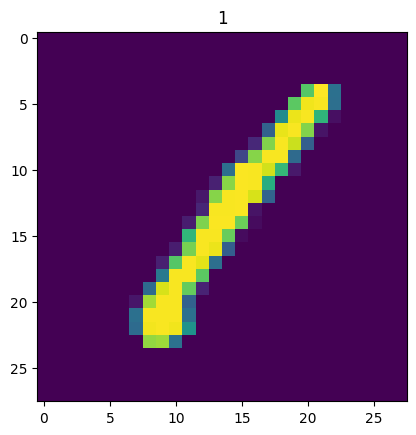

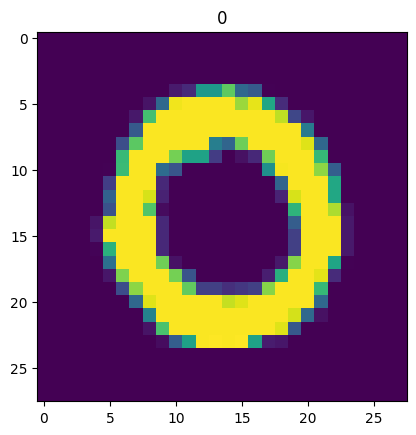

In [6]:
for i in range(2): #Cicle
    random_image = i #Select a random index
    sample_image = X.iloc[random_image].values.reshape(28, 28) #Reshapes a row
    plt.imshow(sample_image) #Shows matrix
    plt.title(y.iloc[random_image]) #Shows label as title
    plt.show() #Display

## Classification

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
#Scaling the data
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [ ]:
%%time
#Training time first Logistic Regression using all features
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X, y)

## Decomposition PCA

In [ ]:
pca = PCA(200) #Instanciate PCA object with N_components = 200
X_transformed = pca.fit_transform(X) #Transforms data
X_transformed.shape #Prints shapes

(42000, 200)

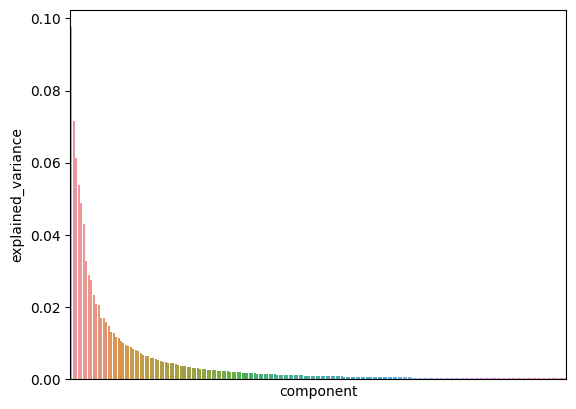

In [ ]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) #Gets explained variance
exp_variance["component"] = exp_variance.index + 1 #Assign a PC number
exp_variance = exp_variance.rename(columns={0: "explained_variance"}) #Rename 0 column to explained_variance
sns.barplot(exp_variance, x="component", y = "explained_variance") #Plot explained variance
plt.xticks([]) #Drops xticks
plt.show() #Display

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


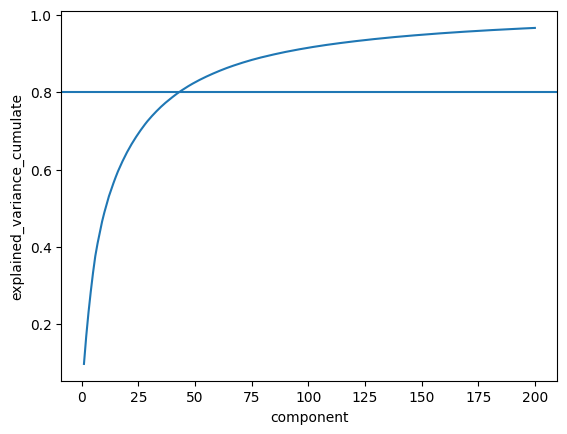

In [ ]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum() #Cummulative sum
sns.lineplot(exp_variance, x = "component", y="explained_variance_cumulate") #Plots
plt.axhline(0.8)  #Plots line at 80% of variance
plt.show() #Display

In [ ]:
exp_variance_sample = exp_variance[exp_variance.explained_variance_cumulate <= 0.8] #Selects lower than 80%
num_components = exp_variance_sample.shape[0] #Obtains number of rows (components to use)
num_components

42

In [ ]:
pca = PCA(num_components) #New PCA with n_components
X_transformed = pca.fit_transform(X) #Transform data
X_transformed.shape

(42000, 42)

In [ ]:
%%time
#Logistic regression using 42 components
lr = LogisticRegression()
lr.fit(X_transformed, y)
lr.score(X_transformed, y)

CPU times: user 11.2 s, sys: 107 ms, total: 11.3 s
Wall time: 2.92 s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9056190476190477

## Visualize components

<Axes: xlabel='0', ylabel='1'>

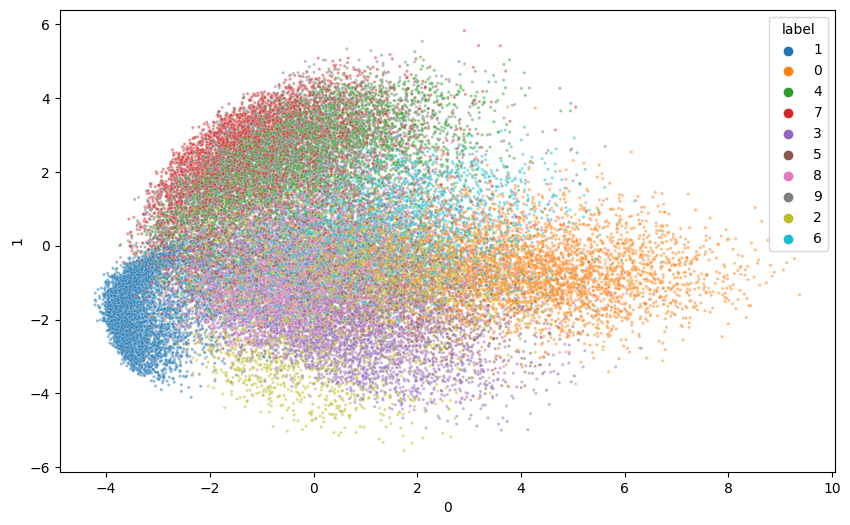

In [ ]:
X_transformed = pd.DataFrame(X_transformed) #Dataframe transformed
plt.figure(figsize=(10,6)) #Set image size
sns.scatterplot(X_transformed, x=0, y=1, hue=y.astype(str), alpha=0.5, s=5) #First 2 components, colored by label.

## Loadings

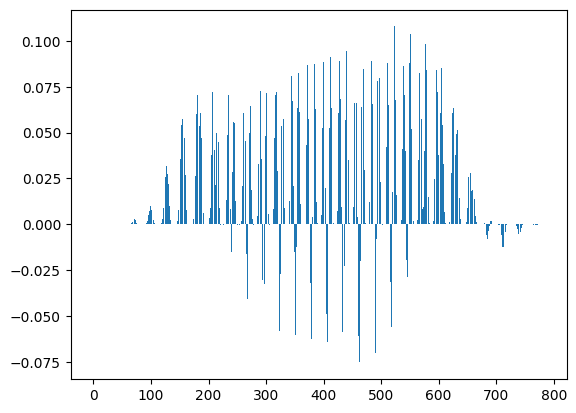

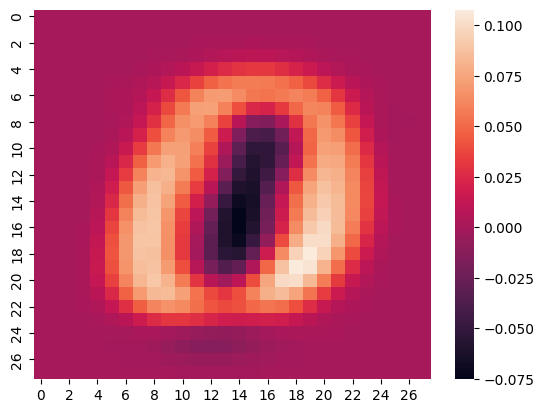

In [ ]:
loadings = pd.DataFrame(pca.components_) #Obtains loadings of each component
plt.bar(height = loadings.iloc[0], x = loadings.iloc[0].index) #Plot loadings of first component
plt.show()
first_component = loadings.iloc[0].values.reshape(28,28)
sns.heatmap(first_component) #Heatmap of first component
plt.show()